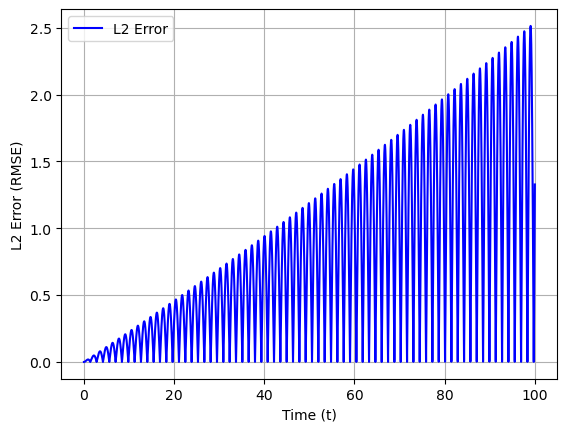

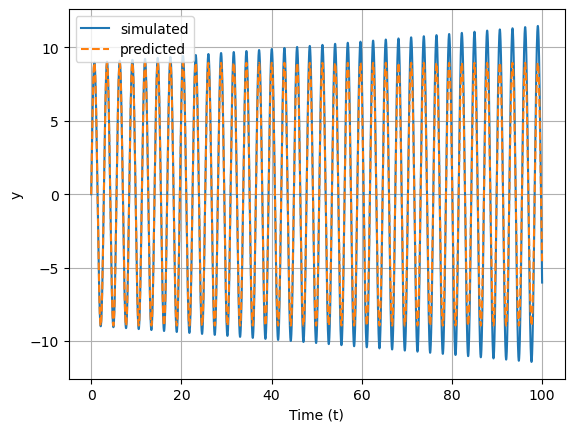

In [2]:
#L2 Error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats

v0 = 20.
x = np.array([0., v0])
dt = 10**(-3)
k = 5.
def f(_x):
    z, v = _x[0], _x[1]
    return np.array([v, (-1.) * k * z])

time = np.arange(0, 100, dt)

pos = [x[0]]
for _, _ in enumerate(time[:-1]):
    new_x = x + f(x) * dt
    pos.append(new_x[0])
    x[:] = new_x

# period = np.sqrt(k) #Found from finding zero position points, and finiding corresponding indeces in pos
omega = np.sqrt(k)

y = (v0 / omega) * np.sin(omega * time)

#L2 error
l2 = []
for i in range(len(pos)):
    simulated_values = np.array([pos[i]])
    predicted_values = np.array([y[i]])
    rmse = np.sqrt(mean_squared_error(simulated_values, predicted_values))
    l2.append(rmse)

plt.plot(time, l2, '-b', label = 'L2 Error')
plt.xlabel('Time (t)')
plt.ylabel('L2 Error (RMSE)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(time, pos, label = 'simulated')
plt.plot(time, y, label = 'predicted', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

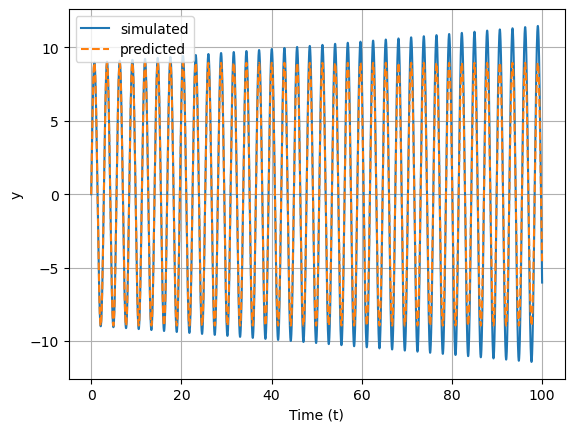